In [ ]:
"""
An example of autoencoder implementation using MNIST data

AE can be considered a self-learner model as they map data features into the 
latent space which is later used for decoding the image.

It is important to point out that AEs are lossy when used for data compression 
and also can only work on the data that it was trained to encode and decode.

This example will demonstrate the basics of creating AE and applying to denoise 
images.

"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

from keras import layers

In [2]:
#Load data

(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Prepare data
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0




11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)
print(X_train.shape)
print(y_train[1:10])

(60000, 784)
[0 4 1 9 2 1 3 1 4]


In [6]:
#Create a simple encorder, decoder and autoencoder
encoding_dim=64
input_shape=28*28
input=keras.Input(shape=(input_shape,))
encoded=layers.Dense(encoding_dim,activation='relu')(input)
decoded=layers.Dense(input_shape,activation='sigmoid')(encoded)


#Create the autoencoder model
autoencoder=keras.Model(input,decoded)
print(autoencoder.summary())

#Create the encoder model
encoder=keras.Model(input,encoded)

#Create the decoder model
encoded_input=keras.Input(shape=(encoding_dim,))
decoded_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))



#compile models
autoencoder.compile(optimizer='adam',loss='binary_crossentropy') #NOTE we are focusing on pixel to pixel conversion


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
#Set params
EPOCHS=50
BATCH=256
VAL_SPLIT=0.2

Epoch 1/50
188/188 [==============================] - 4s 5ms/step - loss: 0.2633 - val_loss: 0.1759
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1556 - val_loss: 0.1392
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1291 - val_loss: 0.1200
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1137 - val_loss: 0.1078
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1032 - val_loss: 0.0996
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0957 - val_loss: 0.0931
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0903 - val_loss: 0.0887
Epoch 8/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0863 - val_loss: 0.0853
Epoch 9/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0833 - val_loss: 0.0827
Epoch 10/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0810 - val_loss: 0.0808

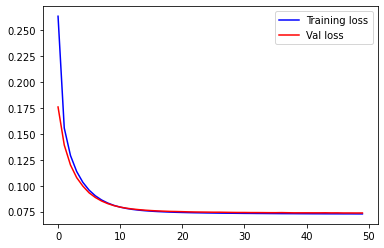

In [8]:
history=autoencoder.fit(X_train,X_train,epochs=EPOCHS,batch_size=BATCH,validation_split=0.2, shuffle=True)
epochs=history.epoch
history=history.history
print("best epoch",epochs[np.argmin(history['val_loss'])])

plt.plot(epochs,history['loss'],'-b',label='Training loss')
plt.plot(epochs,history['val_loss'],'-r',label='Val loss')
plt.legend()
plt.show()



In [9]:
#Explore model performance
encoded_images=encoder.predict(X_test)
decoded_images=decoder.predict(encoded_images)

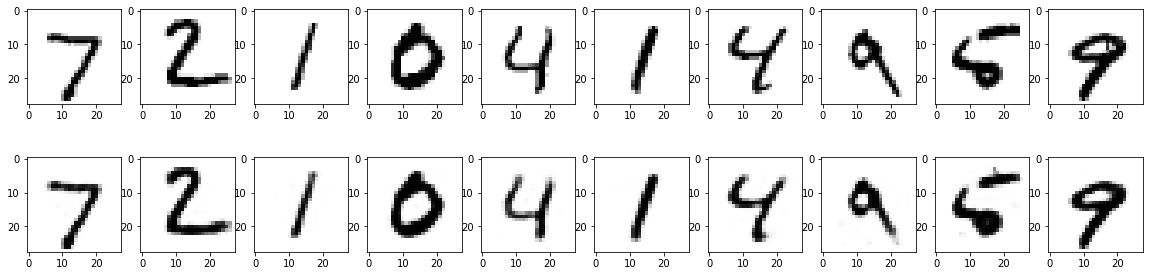

In [10]:
#Visuale model outputs
fig,ax=plt.subplots(2,10,figsize=(20,5))

for i in range(10):
  #Encoded images
  ax[0,i].imshow(X_test[i].reshape(28,28),cmap='binary')
  #Decoded images
  ax[1,i].imshow(decoded_images[i].reshape(28,28),cmap='binary')

plt.show()

In [21]:
#Create a deep autoencoder

input_shape=28*28

input=keras.Input(shape=(input_shape,))
encoded=layers.Dense(256,activation='relu')(input)
encoded=layers.Dense(128,activation='relu')(encoded)
encoded=layers.Dense(64,activation='relu')(encoded)

encoded_latent=layers.Dense(32,activation='relu')(encoded)

decoded=layers.Dense(64,activation='relu')(encoded_latent)
decoded=layers.Dense(128,activation='relu')(decoded)
decoded=layers.Dense(256,activation='relu')(decoded)
decoded=layers.Dense(input_shape,activation='sigmoid')(decoded)

#Create the autoencoder model
autoencoder=keras.Model(input,decoded)

print(autoencoder.summary())


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dense_19 (Dense)            (None, 128)               832

In [12]:
#Create the encoder model
encoder=keras.Model(input,encoded_latent)

#Create the decoder model
encoded_input=keras.Input(shape=(32,))
decoded_layer=autoencoder.layers[-4](encoded_input)
decoded_layer=autoencoder.layers[-3](decoded_layer)
decoded_layer=autoencoder.layers[-2](decoded_layer)
decoded_layer=autoencoder.layers[-1](decoded_layer)
decoder=keras.Model(encoded_input,decoded_layer)



#compile models
autoencoder.compile(optimizer='adam',loss='binary_crossentropy') #NOTE we are focusing on pixel to pixel conversion


In [ ]:
history=autoencoder.fit(X_train,X_train,epochs=EPOCHS,batch_size=BATCH,validation_split=0.2, shuffle=True)
epochs=history.epoch
history=history.history
print("best epoch",epochs[np.argmin(history['val_loss'])])

plt.plot(epochs,history['loss'],'-b',label='Training loss')
plt.plot(epochs,history['val_loss'],'-r',label='Val loss')
plt.legend()
plt.show()


In [15]:
#Explore model performance
encoded_images=encoder.predict(X_test)
decoded_images=decoder.predict(encoded_images)
autoencoder_images=autoencoder.predict(X_test) #Instead of splitting model into encoder and decoder

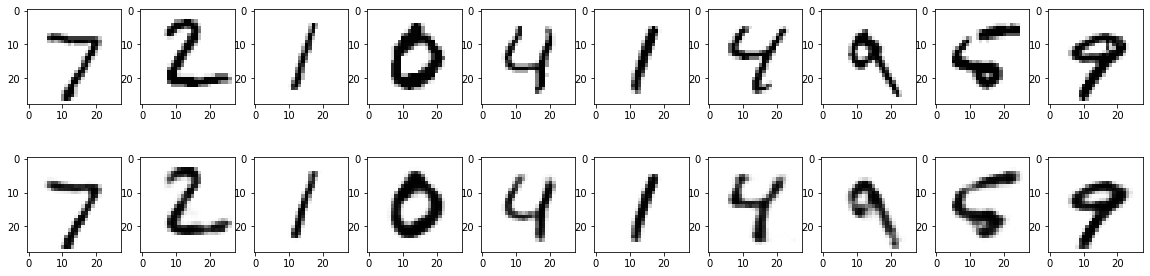

In [17]:
#Visuale model outputs
fig,ax=plt.subplots(2,10,figsize=(20,5))

for i in range(10):
  #Encoded images
  ax[0,i].imshow(X_test[i].reshape(28,28),cmap='binary')
  #Decoded images
  ax[1,i].imshow(decoded_images[i].reshape(28,28),cmap='binary')


plt.show()

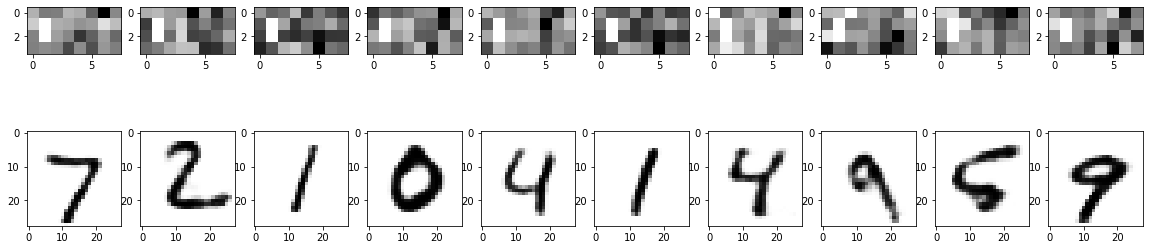

In [23]:
  #Inspect autoencoder images
  fig,ax=plt.subplots(2,10,figsize=(20,5))
  for i in range(10): 
    #Visualise the encoded images
    ax[0,i].imshow(ecoded_images[i].reshape(4,8),cmap='binary') #Note there are 32 points in this layer
    ax[1,i].imshow(autoencoder_images[i].reshape(28,28),cmap='binary')

  plt.show()

In [35]:
#Create a sparse model to reduce overfitting and ensure the useful feature extraction
#Create a deep sparse autoencoder

input_shape=28*28

input=keras.Input(shape=(input_shape,))
encoded=layers.Dense(256,activation='relu', activity_regularizer=keras.regularizers.l1(10e-6))(input)
encoded=layers.Dense(128,activation='relu',activity_regularizer=keras.regularizers.l1(10e-6))(encoded)
encoded=layers.Dense(64,activation='relu',activity_regularizer=keras.regularizers.l1(10e-6))(encoded)

encoded_latent=layers.Dense(32,activation='relu')(encoded)

decoded=layers.Dense(64,activation='relu')(encoded_latent) #Note dense layer does not necessarily needs to be a mirror image of encoder
decoded=layers.Dense(128,activation='relu')(decoded)
decoded=layers.Dense(256,activation='relu')(decoded)
decoded=layers.Dense(input_shape,activation='sigmoid')(decoded)

#Create the autoencoder model
reg_autoencoder=keras.Model(input,decoded)

print(reg_autoencoder.summary())


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_54 (Dense)            (None, 256)               200960    
                                                                 
 dense_55 (Dense)            (None, 128)               32896     
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 64)                2112      
                                                                 
 dense_59 (Dense)            (None, 128)               832

In [39]:
#Create the encoder model
encoder_reg=keras.Model(input,encoded_latent)

#Create the decoder model
encoded_input=keras.Input(shape=(32,))
decoded_layer=reg_autoencoder.layers[-4](encoded_input)
decoded_layer=reg_autoencoder.layers[-3](decoded_layer)
decoded_layer=reg_autoencoder.layers[-2](decoded_layer)
decoded_layer=reg_autoencoder.layers[-1](decoded_layer)
decoder=keras.Model(encoded_input,decoded_layer)



#compile models
reg_autoencoder.compile(optimizer='adam',loss='binary_crossentropy') #NOTE we are focusing on pixel to pixel conversion


Epoch 1/50
188/188 [==============================] - 2s 6ms/step - loss: 0.0897 - val_loss: 0.0905
Epoch 2/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0878 - val_loss: 0.0908
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0878 - val_loss: 0.0907
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0877 - val_loss: 0.0910
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0877 - val_loss: 0.0908
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0875 - val_loss: 0.0903
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0875 - val_loss: 0.0907
Epoch 8/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0874 - val_loss: 0.0903
Epoch 9/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0873 - val_loss: 0.0902
Epoch 10/50
188/188 [==============================] - 1s 7ms/step - loss: 0.0872 - val_loss: 0.0906

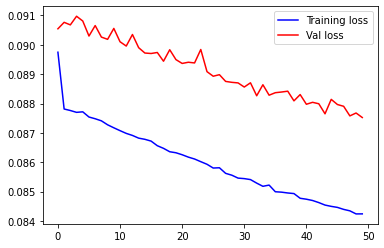

In [40]:
history=reg_autoencoder.fit(X_train,X_train,epochs=EPOCHS,batch_size=BATCH,validation_split=0.2, shuffle=True)
epochs=history.epoch
history=history.history
print("best epoch",epochs[np.argmin(history['val_loss'])])

plt.plot(epochs,history['loss'],'-b',label='Training loss')
plt.plot(epochs,history['val_loss'],'-r',label='Val loss')
plt.legend()
plt.show()

In [41]:
#Explore model performance
encoded_images=encoder_reg.predict(X_test)
decoded_images=decoder.predict(encoded_images)
autoencoder_images=reg_autoencoder.predict(X_test) #Instead of splitting model into encoder and decoder

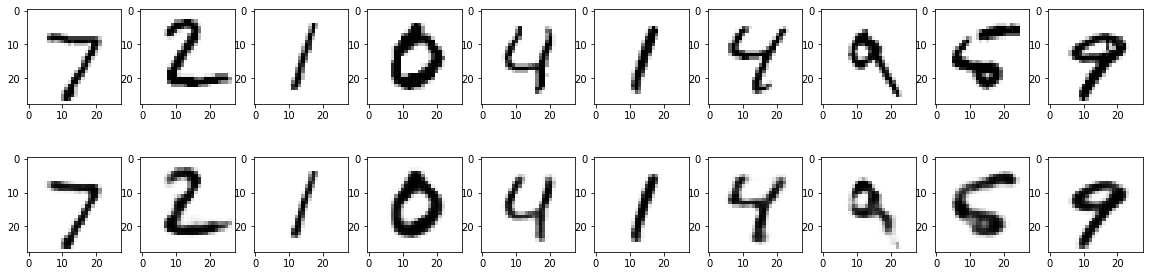

In [42]:
#Visuale model outputs
fig,ax=plt.subplots(2,10,figsize=(20,5))

for i in range(10):
  #Encoded images
  ax[0,i].imshow(X_test[i].reshape(28,28),cmap='binary')
  #Decoded images
  ax[1,i].imshow(decoded_images[i].reshape(28,28),cmap='binary')


plt.show()

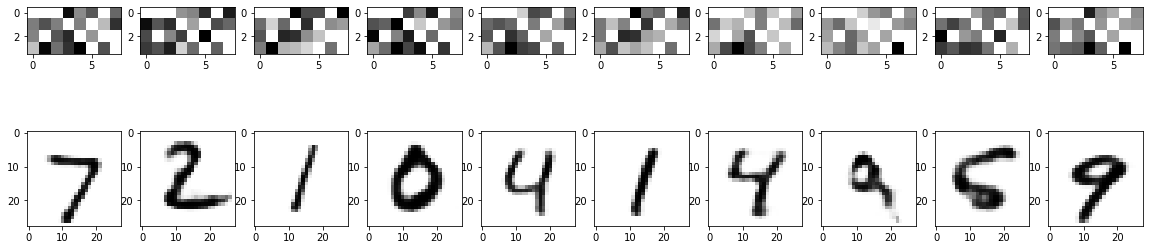

In [43]:
  #Inspect autoencoder images
  fig,ax=plt.subplots(2,10,figsize=(20,5))
  for i in range(10): 
    #Visualise the encoded images
    ax[0,i].imshow(ecoded_images[i].reshape(4,8),cmap='binary') #Note there are 32 points in this layer
    ax[1,i].imshow(autoencoder_images[i].reshape(28,28),cmap='binary')

  plt.show()

In [51]:
#Example of data denoising using ConvNets

#Load data

(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Prepare data
X_train=X_train.astype('float32')/255.0
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.astype('float32')/255.0
X_test=X_test.reshape(-1,28,28,1)

#Add noise to the data
noise=0.5
X_train_noise=X_train+noise*np.random.normal(loc=0.0,scale=1.0,size=X_train.shape)
X_train_noise=np.clip(X_train_noise,0.0,1.0) #ensure that the range remains within the scaled interval
X_test_noise=X_test+noise*np.random.normal(loc=0.0,scale=1.0,size=X_test.shape)
X_test_noise=np.clip(X_test_noise,0.0,1.0)

In [52]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [85]:
input_shape=(28,28,1)

input=keras.Input(shape=input_shape)

encoded=layers.Conv2D(16,(3,3),padding='same',activation='relu')(input)
encoded=layers.MaxPooling2D((2,2),padding='same')(encoded)
encoded=layers.Conv2D(8,(3,3),padding='same',activation='relu')(encoded)
encoded=layers.MaxPooling2D((2,2),padding='same')(encoded)
encoded=layers.Conv2D(8,(3,3),padding='same',activation='relu')(encoded)

encoded_latent=layers.MaxPooling2D((2,2),padding='same')(encoded)

decoded=layers.Conv2D(8,(3,3),padding='same',activation='relu')(encoded_latent)
decoded=layers.UpSampling2D((2,2))(decoded)
decoded=layers.Conv2D(8,(3,3),padding='same',activation='relu')(decoded)
decoded=layers.UpSampling2D((2,2))(decoded)
decoded=layers.Conv2D(16,(3,3),padding='valid',activation='relu')(decoded) #Note final layer needs to have a valid padding
decoded=layers.UpSampling2D((2,2))(decoded)

decoded=layers.Conv2D(1,(3,3),padding='same',activation='sigmoid')(decoded)
#Create the autoencoder model
autoencoder=keras.Model(input,decoded)

print(autoencoder.summary())

#compile models

#Create the encoder model
encoder=keras.Model(input,encoded_latent)

#Create the decoder model
encoded_input=keras.Input(shape=(4,4,8))
decoded_layer=autoencoder.layers[-7](encoded_input)
decoded_layer=autoencoder.layers[-6](decoded_layer)
decoded_layer=autoencoder.layers[-5](decoded_layer)
decoded_layer=autoencoder.layers[-4](decoded_layer)
decoded_layer=autoencoder.layers[-3](decoded_layer)
decoded_layer=autoencoder.layers[-2](decoded_layer)
decoded_layer=autoencoder.layers[-1](decoded_layer)
decoder=keras.Model(encoded_input,decoded_layer)



#compile models
autoencoder.compile(optimizer='adam',loss='binary_crossentropy') #NOTE we are focusing on pixel to pixel conversion


Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_77 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 7, 7, 8)           584

Epoch 1/50
188/188 [==============================] - 2s 10ms/step - loss: 0.5747 - val_loss: 0.5499
Epoch 2/50
188/188 [==============================] - 2s 8ms/step - loss: 0.5432 - val_loss: 0.5390
Epoch 3/50
188/188 [==============================] - 1s 8ms/step - loss: 0.5361 - val_loss: 0.5342
Epoch 4/50
188/188 [==============================] - 2s 9ms/step - loss: 0.5321 - val_loss: 0.5306
Epoch 5/50
188/188 [==============================] - 1s 8ms/step - loss: 0.5291 - val_loss: 0.5282
Epoch 6/50
188/188 [==============================] - 1s 8ms/step - loss: 0.5271 - val_loss: 0.5267
Epoch 7/50
188/188 [==============================] - 2s 8ms/step - loss: 0.5257 - val_loss: 0.5254
Epoch 8/50
188/188 [==============================] - 1s 8ms/step - loss: 0.5246 - val_loss: 0.5243
Epoch 9/50
188/188 [==============================] - 1s 8ms/step - loss: 0.5237 - val_loss: 0.5235
Epoch 10/50
188/188 [==============================] - 1s 8ms/step - loss: 0.5230 - val_loss: 0.522

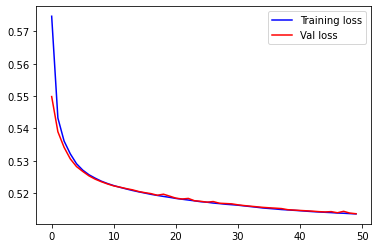

In [86]:
history=autoencoder.fit(X_train_noise,X_train_noise,epochs=EPOCHS,batch_size=BATCH,validation_split=0.2, shuffle=True)
epochs=history.epoch
history=history.history
print("best epoch",epochs[np.argmin(history['val_loss'])])

plt.plot(epochs,history['loss'],'-b',label='Training loss')
plt.plot(epochs,history['val_loss'],'-r',label='Val loss')
plt.legend()
plt.show()

In [87]:
#Explore model performance
encoded_images=encoder.predict(X_test)
decoded_images=decoder.predict(encoded_images)
autoencoder_images=autoencoder.predict(X_test) #Instead of splitting model into encoder and decoder


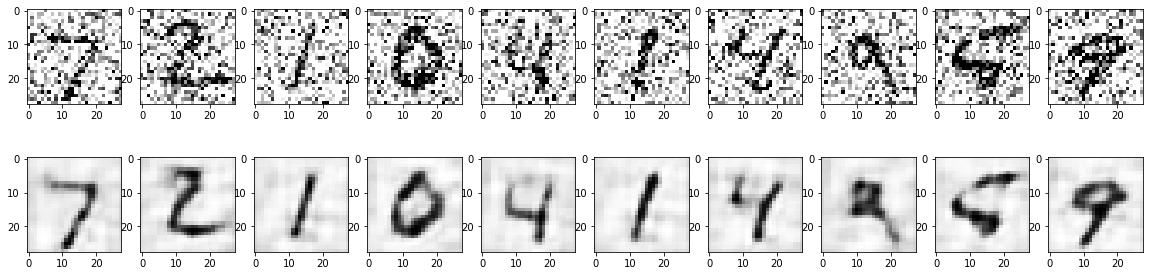

In [88]:
#Visuale model outputs
fig,ax=plt.subplots(2,10,figsize=(20,5))

for i in range(10):
  #Encoded images
  ax[0,i].imshow(X_test_noise[i].reshape(28,28),cmap='binary')
  #Decoded images
  ax[1,i].imshow(decoded_images[i].reshape(28,28),cmap='binary')


plt.show()

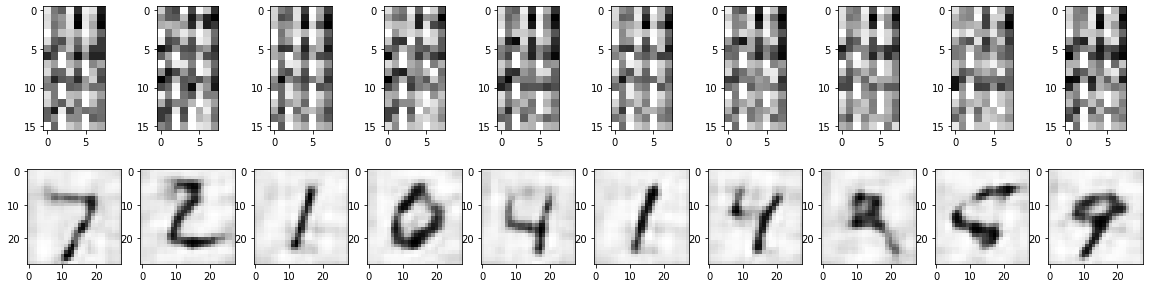

In [89]:
  #Inspect autoencoder images
  fig,ax=plt.subplots(2,10,figsize=(20,5))
  for i in range(10): 
    #Visualise the encoded images
    ax[0,i].imshow(encoded_images[i].reshape(16,8),cmap='binary') #Note there are 128 points in this layer
    ax[1,i].imshow(autoencoder_images[i].reshape(28,28),cmap='binary')

  plt.show()